In [1]:
import networkx as nx
from kuramoto import Kuramoto, plot_phase_coherence, plot_activity, plot_heatmap

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=2.)

## 1) Erdős-Rényi

### Running simulations for various coupling strengths:

In [3]:
# Erdős-Rényi:
# The graph generated is a Binomial Graph with 'n'-nodes
# where the probability of an edge existing is 'p'

# Synchronization predicted quicker than other graphs due to simple nature

# Initializing the graph and finding its adjacency matrix
nxg = nx.erdos_renyi_graph(n=25, p=1, seed=22)
adj_mat = nx.to_numpy_array(nxg)

coupling = 0.5
dt = 0.01
T = 10
j = 0

fig, axs = plt.subplots(2,3, figsize=(14,10))
fig.suptitle('Kuramoto Synchronization Erdős-Rényi')

for j in range(6): 
    # Instantiate model with parameters, running the simulation and plotting
    model = Kuramoto(coupling, dt, T, n_nodes=len(adj_mat))
    sim = model.run(adj_mat)
    if j <= 2:
        axs[0,j].plot(np.sin(sim.T))
        axs[0,j].set_title(f"Coupling = {coupling}")
    else:
        axs[1,j%3].plot(np.sin(sim.T))
        axs[1,j%3].set_title(f"Coupling = {coupling}")
    coupling *= 1.75
    j += 1
    
for ax in axs.flat:
    ax.set(xlabel='Time', ylabel=r'$\sin(\theta)$')
    
for ax in axs.flat:
    ax.label_outer()

plt.subplots_adjust(left=0.1,
                    bottom=0.3, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

plt.savefig("./images/renyi_25_1.svg", dpi=1200)
plt.close(fig)

### Plotting order parameter to find global synchronization point:

True


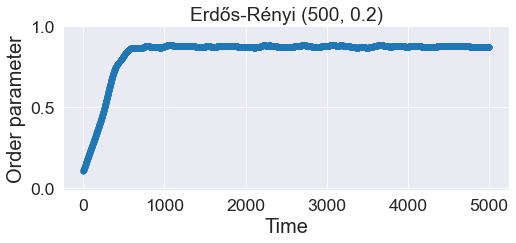

In [6]:
nxg = nx.erdos_renyi_graph(n=500, p=0.2)
print(nx.is_connected(nxg))
adj_mat = nx.to_numpy_array(nxg)
model = Kuramoto(coupling=2.5, dt=0.01, T=50, n_nodes=len(nx.nodes(nxg)))
sim = model.run(adj_mat)

ax = plot_phase_coherence(sim)
ax.set_title('Erdős-Rényi (500, 0.2)');

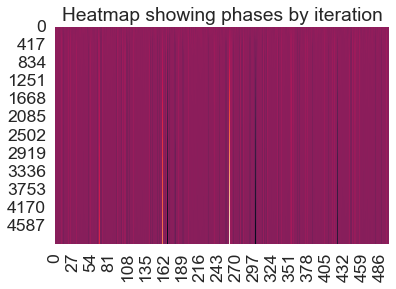

In [7]:
plot_heatmap(sim);

In [8]:
Kuramoto.concentrated

False

## 2) Watts–Strogatz

### Running simulations for various coupling strengths:

In [6]:
# Watts–Strogatz:
# First creates a ring over 'n' nodes. 
# Then each node in the ring is joined to its 'k' nearest neighbors (or 'k-1' neighbors if  is odd). 
# Then shortcuts are created by replacing some edges as follows: 
# for each edge (u,v) in the underlying “n-ring with k nearest neighbors” 
# with probability p replace it with a new edge (u,w) with uniformly random choice of existing node w.

 
# Initializing the graph and finding its adjacency matrix
nxg = nx.watts_strogatz_graph(n=25, k=3, p=1, seed=22)
adj_mat = nx.to_numpy_array(nxg)

coupling = 0.5
dt = 0.01
T = 10
j = 0

fig, axs = plt.subplots(2,3, figsize=(14,10))
fig.suptitle('Kuramoto Synchronization Watts–Strogatz')

for j in range(6): 
    # Instantiate model with parameters, running the simulation and plotting
    model = Kuramoto(coupling, dt, T, n_nodes=len(adj_mat))
    sim = model.run(adj_mat)
    if j <= 2:
        axs[0,j].plot(np.sin(sim.T))
        axs[0,j].set_title(f"Coupling = {coupling}")
    else:
        axs[1,j%3].plot(np.sin(sim.T))
        axs[1,j%3].set_title(f"Coupling = {coupling}")
    coupling *= 1.75
    j += 1
    
for ax in axs.flat:
    ax.set(xlabel='Time', ylabel=r'$\sin(\theta)$')
    
for ax in axs.flat:
    ax.label_outer()

plt.subplots_adjust(left=0.1,
                    bottom=0.3, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

plt.savefig("./images/watts_25_2_1.svg", dpi=1200)
plt.close(fig)

### Plotting order parameter to find global synchronization point:

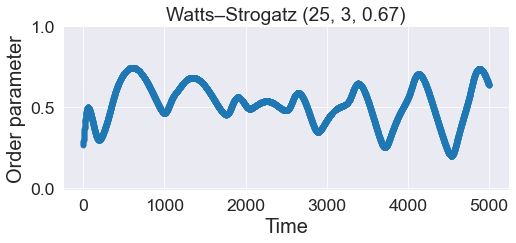

In [9]:
nxg = nx.watts_strogatz_graph(n=25, k=3, p=0.67, seed=22)
adj_mat = nx.to_numpy_array(nxg)
model = Kuramoto(coupling=2.5, dt=0.01, T=50, n_nodes=len(adj_mat))
sim = model.run(adj_mat)

plt = plot_phase_coherence(sim)
plt.set_title('Watts–Strogatz (25, 3, 0.67)');

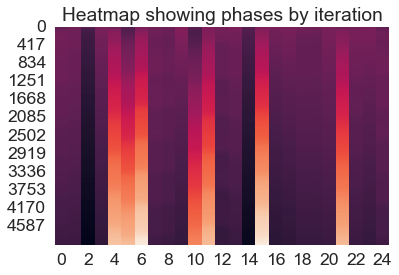

In [10]:
plot_heatmap(sim);

In [11]:
Kuramoto.concentrated

False

### 3) Cyclic Graph

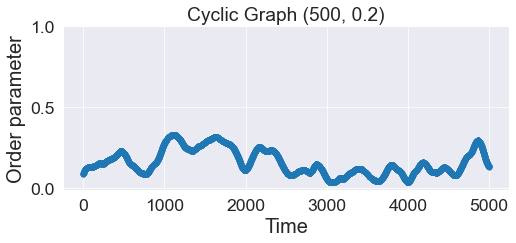

In [12]:
nxg = nx.cycle_graph(n=100)
natfreqs = np.repeat(2* np.pi * 0, len(nxg.nodes()))
adj_mat = nx.to_numpy_array(nxg)
model = Kuramoto(coupling=2.5, dt=0.01, T=50, n_nodes=len(nx.nodes(nxg)))
sim = model.run(adj_mat)

ax = plot_phase_coherence(sim)
ax.set_title('Cyclic Graph (500, 0.2)');

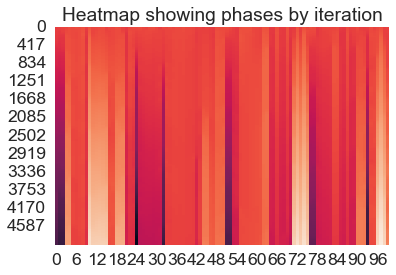

In [13]:
plot_heatmap(sim);

In [14]:
Kuramoto.concentrated

False